# Udacity Machine Learning NanoDegree Capstone Project - Todd Farr

---

Wearable devices have become extremely popular in recent years for tracking user activity.  These small devices use movement and motion data obtained through internal sensors that give insights into the various types of activities that are being performed by the user.  This initial data exploration Notebook is to better understand the dataset, it's features & targets, and how best to proceed with fitting a model to it. 

### Smartphone-Based Recognition of Human Activities and Postural Transitions Data Set 

*Note: This data set was obtained from the UCI Machine Learning Repository found here:  http://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions* 

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# inline graphs in Jupyter Notebook 
%matplotlib inline 

### X train, X test import 

In [5]:
# create a features list
with open('hapt-data/features.txt', 'r') as f:
    features = [line.strip() for line in f]

In [9]:
# load the training set features 
X_train = pd.read_csv('hapt-data/Train/X_train.txt', sep=' ', header=None)
X_train.columns = features 
X_train.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


In [158]:
# load the testing set features 
X_test = pd.read_csv('hapt-data/Test/X_test.txt', sep=' ', header=None)
X_test.columns = features 
X_test.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849


In [164]:
print 'The training set has {} examples'.format(len(X_train))
print 'The testing set has  {} examples'.format(len(X_test))
print ''
print 'The percentage of test to total examples is {:.2f}%'.format(len(X_test) / float(len(X_test) + len(X_train)) * 100) 

The training set has 7767 examples
The testing set has  3162 examples

The percentage of test to total examples is 28.93%


### Target dataframe Y. 

----

12 Different activities that correspond to the data collect 

In [32]:
# what are the activity labels
with open('hapt-data/activity_labels.txt', 'r') as f:
    activites = [line.strip() for line in f]

activity_dict = {}
    
for activity in activites:
    if int(activity[0:2]) <= 9:
        activity_dict[activity[0]] = activity[2:]
        print 'Activity #{} corresponds to {}'.format(activity[0] + ' ', activity[2:])
    else:
        activity_dict[activity[0:2]] = activity[3:]
        print 'Activity #{} corresponds to {}'.format(activity[0:2], activity[3:])

Activity #1  corresponds to WALKING
Activity #2  corresponds to WALKING_UPSTAIRS
Activity #3  corresponds to WALKING_DOWNSTAIRS
Activity #4  corresponds to SITTING
Activity #5  corresponds to STANDING
Activity #6  corresponds to LAYING
Activity #7  corresponds to STAND_TO_SIT
Activity #8  corresponds to SIT_TO_STAND
Activity #9  corresponds to SIT_TO_LIE
Activity #10 corresponds to LIE_TO_SIT
Activity #11 corresponds to STAND_TO_LIE
Activity #12 corresponds to LIE_TO_STAND


In [33]:
# load the training set targets
y_train = pd.read_csv('hapt-data/Train/y_train.txt', sep=' ', header=None)
y_train.columns = ['activity']

In [165]:
# load the testing set targets
y_test = pd.read_csv('hapt-data/Test/y_test.txt', sep=' ', header=None)
y_test.columns = ['activity']

## Does Class Imbalance Matter for Multi-Classification Problems??

----

This section explores the data from a class imbalance perspective which will affect the PCA Analysis results 

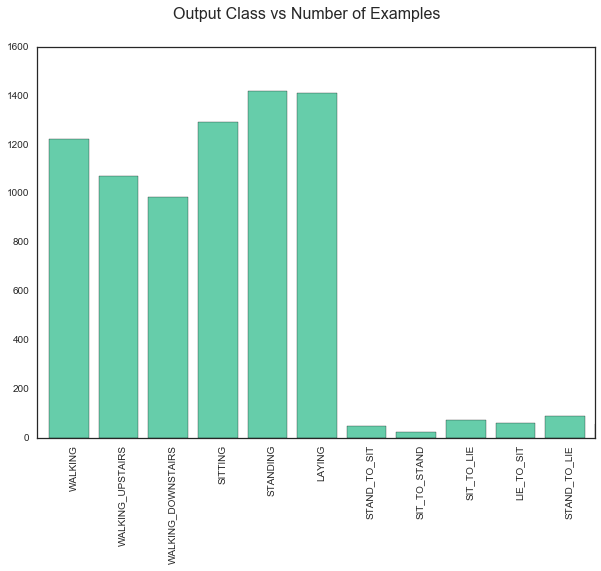

In [259]:
import numpy as np

activity_type, counts = np.unique(y_train.activity.values, return_counts=True)

plt.figure(figsize=(10, 7))

plt.bar(activity_type, counts, color='mediumaquamarine')
plt.suptitle('Output Class vs Number of Examples', fontsize=16)
plt.xticks([(x + 1.5) for x in range(len(counts))], [x.split()[1] for x in activites], rotation=90)
plt.xlim([0.75, 12])

plt.show()

## PCA Analysis

---

Becasue the demensions of this problem are fairly large. It was decided to try to reduce this by applying PCA. 

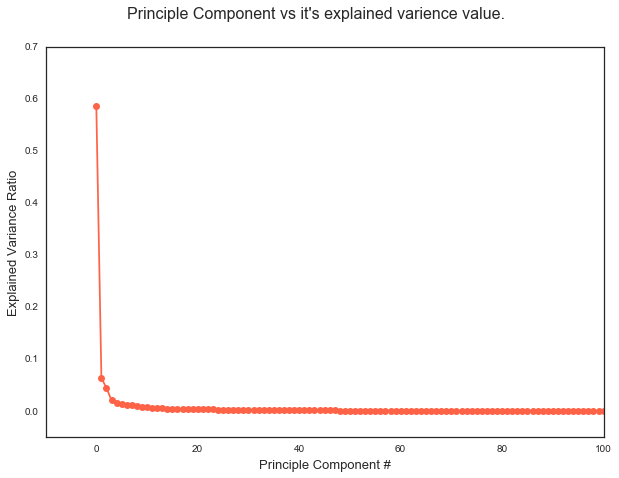

In [290]:
# Full PCA of same shape to see how much variance is captured by each PCA  
from sklearn.decomposition import PCA
pca = PCA(n_components = X_train.shape[1], whiten=True)

pca.fit(X_train)

#plot PCA component vs it's explained Variance 
plt.figure(figsize=(10, 7))

# plot limits 
plt.xlim([-10, 100])
plt.ylim([-0.05, 0.7])

# plot priniciple components 
plt.scatter([x for x in range(X_train.shape[1])], pca.explained_variance_ratio_, s=20, color='tomato') 
plt.plot([x for x in range(X_train.shape[1])], pca.explained_variance_ratio_, '-o', c='tomato')

# set up plot annotations 
plt.suptitle("Principle Component vs it's explained varience value.", fontsize=16)
plt.xlabel('Principle Component #', fontsize=13)
plt.ylabel('Explained Variance Ratio', fontsize=13)

plt.show()

**Findings:** There is a significant drop off in the Explained Variance at low principle component numbers.  These variance ratios flatline just after about 40 PCs.  This hints a majority of the Explained Variance can be captured with a relatively low number of PCs. 

----

In [127]:
# how many PCA's do we need to include to capture 90% of the explained varience 
variance_total = 0
for i, value in enumerate(pca.explained_variance_ratio_):
    variance_total += value
    if variance_total >= .9:  # stop at 90%
        print '{:.2f}% of the variance in the data can be explained by {} prinicple components'.format(
            variance_total * 100, i) 
        break #exit loop 
        
print '{:.2f}% of the variance in the data can be explained by  2 prinicple components'.format(
    (pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]) * 100) 
print '{:.2f}% of the variance in the data can be explained by  3 prinicple components'.format(
    (pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] +
    pca.explained_variance_ratio_[2]) * 100) 

90.21% of the variance in the data can be explained by 37 prinicple components
65.06% of the variance in the data can be explained by  2 prinicple components
69.55% of the variance in the data can be explained by  3 prinicple components


## PCA 2D Reduction and Visualization

In [221]:
# Although PCA for 2 components only captures 65% of the explained variance
# for visualization and understanding purposes a PCA reduction to 2 was performed   
from sklearn.decomposition import PCA
pca_2 = PCA(n_components = 2, whiten=True)

pca_2.fit(X_train)

# Print the components and the amount of variance in the data contained in each dimension
print pca_2.components_
print pca_2.explained_variance_ratio_

[[-0.00015235  0.00013133  0.00022622 ..., -0.03660483  0.02668244
   0.02207401]
 [ 0.00125588  0.00270589  0.00196012 ...,  0.05143451 -0.02052715
  -0.02527979]]
[ 0.58635593  0.06425612]


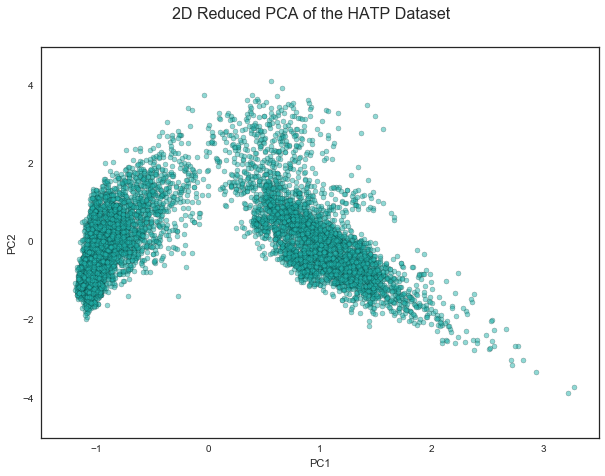

In [222]:
# plot 2-dimensional PCA 
sns.set_style('white')
ax = pd.DataFrame(pca_2.transform(X_train), columns=['PC1', 'PC2']).plot(
        kind='scatter', x='PC1', y='PC2', figsize=(10, 7), s=25.0, 
        alpha=0.5, color='lightseagreen', ylim=[-5, 5], xlim=[-1.5, 3.5])
plt.suptitle('2D Reduced PCA of the HATP Dataset', fontsize=16)

#for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
            #ax.arrow(0, 0, pc1*20, pc2*20, width=0.002, fc='tomato', ec='tomato', alpha=0.5)
            #ax.annotate(X_train.columns[i], (pc1*20, pc2*20), size=5)

plt.show()

## PCA 3D Reduction and Visualizaiton 

In [128]:
# Although PCA for 3 components only captures ~70% of the explained variance
# it's still in a space that can be iniutively understood and visualized. 
from sklearn.decomposition import PCA
pca = PCA(n_components = 3, whiten=True)

pca.fit(X_train)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[ -1.52350723e-04   1.31333804e-04   2.26220409e-04 ...,  -3.66048330e-02
    2.66824414e-02   2.20740051e-02]
 [  1.25587754e-03   2.70588959e-03   1.96011612e-03 ...,   5.14345122e-02
   -2.05271477e-02  -2.52797908e-02]
 [ -6.95889893e-03   4.84213130e-03   3.60302323e-03 ...,  -2.80486575e-01
    1.36272835e-01   1.09363382e-01]]
[ 0.58635593  0.06425612  0.04489017]


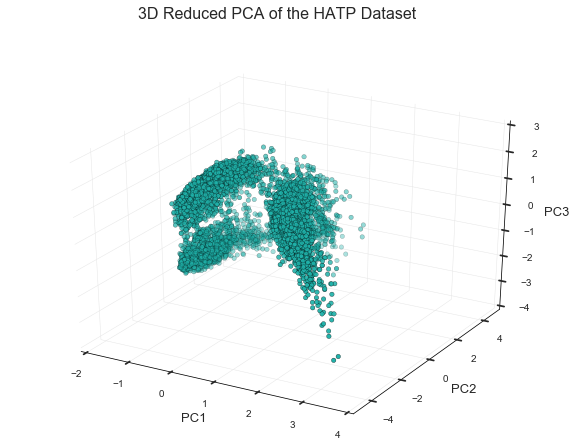

In [157]:
# plot 3-dimensional PCA 
pca_3d = plt.figure(figsize=(10, 7)).gca(projection='3d')
pca_3d_df = pd.DataFrame(pca.transform(X_train), columns=['PC1', 'PC2', 'PC3'])
pca_3d.scatter(pca_3d_df['PC1'], pca_3d_df['PC2'], pca_3d_df['PC3'], c='lightseagreen')

# set labels and titles 
plt.suptitle('3D Reduced PCA of the HATP Dataset', fontsize=16)
pca_3d.set_xlabel('PC1', fontsize=13, labelpad=10)
pca_3d.set_ylabel('PC2', fontsize=13, labelpad=10)
pca_3d.set_zlabel('PC3', fontsize=13, labelpad=10)

# set pane colors
pca_3d.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
pca_3d.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
pca_3d.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

# set grid colors 
pca_3d.w_xaxis.gridlines.set_lw(0.5)
pca_3d.w_yaxis.gridlines.set_lw(0.5)
pca_3d.w_zaxis.gridlines.set_lw(0.5)

plt.show()

## LinearSVC model on 2-Component PCA Reduction

In [223]:
import time
from sklearn.metrics import accuracy_score
from sklearn import svm

# a function to keep track of training time
def train_classifier(clf, X_train, y_train):
    print ("Training {}...".format(clf.__class__.__name__))
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print ("Done!\nTraining time (secs): {:.3f}".format(end - start))

In [227]:
# LinearSVC classifier
clf_pca_2 = svm.LinearSVC()

# Fit model to training data
# transform X_train with the PCA, reshapes the y_train dataframe into a 1D array
train_classifier(clf_pca_2, pca_2.transform(X_train), y_train.activity.values) 
print (clf_pca_2)

Training LinearSVC...
Done!
Training time (secs): 0.456
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


In [225]:
from sklearn.metrics import accuracy_score, confusion_matrix

# function used to output accuracy score and resulting confusion matrix 
def predict_labels(clf, features, target, is_training=True):
    if is_training: 
        which_prediction = 'Training Set'
    else:
        which_prediction = 'Testing Set'
    print ("Predicting labels for {} using {}...".format(which_prediction, clf.__class__.__name__))
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    print ("Done!\nPrediction time for {} (secs): {:.3f}".format(which_prediction ,end - start))
    return accuracy_score(target.values, y_pred), confusion_matrix(target.values, y_pred)

In [229]:
pca_2_train_accuracy_score, pca_2_train_confusion_matrix = predict_labels(
    clf_pca_2, pca_2.transform(X_train), y_train)
print ("Accuracy score for training set: {}".format(pca_2_train_accuracy_score))

Predicting labels for Training Set using LinearSVC...
Done!
Prediction time for Training Set (secs): 0.001
Accuracy score for training set: 0.555684305395


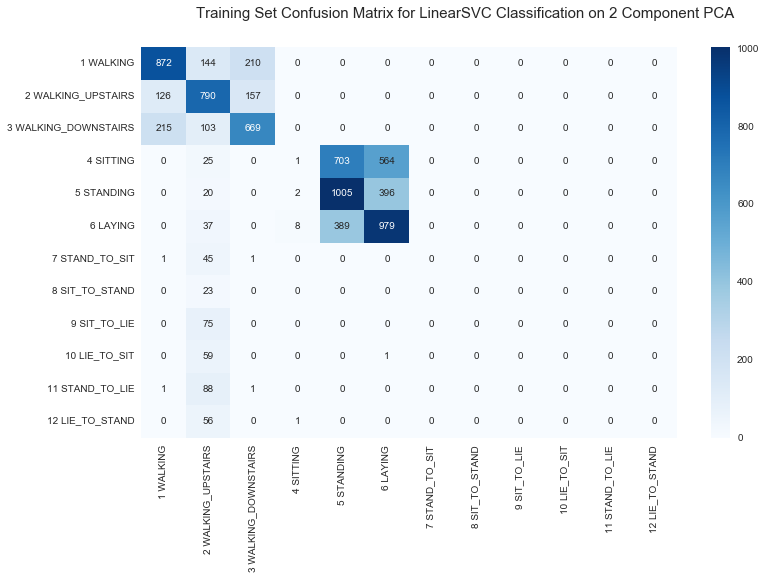

In [297]:
# Training Set Confusion Matrix 
plt.figure(figsize=(12, 7))

# plot 
sns.heatmap(pca_2_train_confusion_matrix, annot=True, fmt='g', cmap='Blues')

# labels and titles
plt.suptitle('Training Set Confusion Matrix for LinearSVC Classification on 2 Component PCA', fontsize=15)
plt.xticks([(x + 0.5) for x in range(12)], activites, rotation=90)
plt.yticks([(x + 0.5) for x in range(12)], activites[::-1], rotation=0)

plt.show()

In [298]:
pca_2_test_accuracy_score, pca_2_test_confusion_matrix = predict_labels(
    clf_pca_2, pca_2.transform(X_test), y_test)
print ("Accuracy score for training set: {}".format(pca_2_test_accuracy_score))

Predicting labels for Training Set using LinearSVC...
Done!
Prediction time for Training Set (secs): 0.000
Accuracy score for training set: 0.54174573055


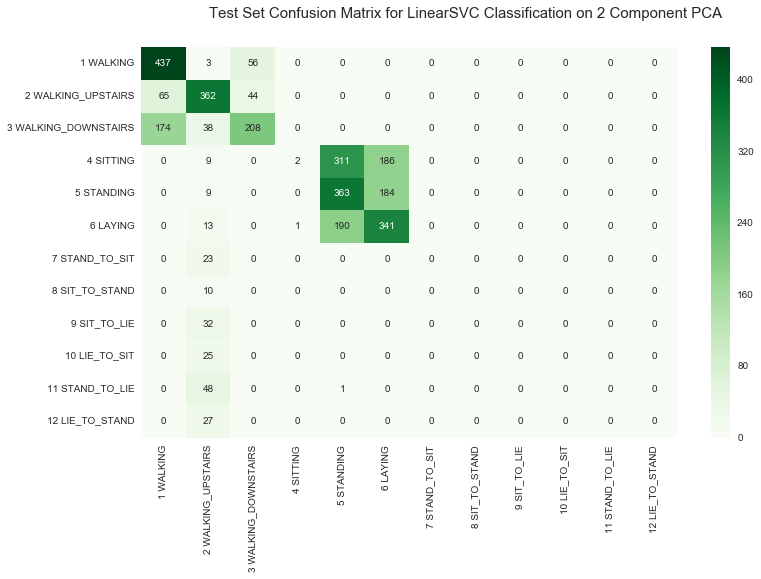

In [299]:
# Test set Confusion Matrix for PCA 2 Component 
plt.figure(figsize=(12, 7))

# plot 
sns.heatmap(pca_2_test_confusion_matrix, annot=True, fmt='g', cmap='Greens')

# labels and titles
plt.suptitle('Test Set Confusion Matrix for LinearSVC Classification on 2 Component PCA', fontsize=15)
plt.xticks([(x + 0.5) for x in range(12)], activites, rotation=90)
plt.yticks([(x + 0.5) for x in range(12)], activites[::-1], rotation=0)

plt.show()

**Conclusion for 2-component PCA:** It becomes very clear that because of the class imbalance that the smaller classes are squashed by the PCA dimensionality reduction.  Therefore the time savings of ~4.5 seconds results in a huge accuracy loss. It's likely that the 3-component PCA will have the same results.  Back to previous data exploration, a 37 PCA will be done since this captures 90% of the variance. 

---

## LinearSVC model on a PCA with 37 components (90% of the variance captured)

In [261]:
# PCA with 37 components 
pca_37 = PCA(n_components = 37, whiten=True)

pca_37.fit(X_train)

# Print the components and the amount of variance in the data contained in each dimension
print pca_37.components_
print pca_37.explained_variance_ratio_

[[ -1.52350723e-04   1.31333804e-04   2.26220409e-04 ...,  -3.66048330e-02
    2.66824414e-02   2.20740051e-02]
 [  1.25587754e-03   2.70588959e-03   1.96011612e-03 ...,   5.14345122e-02
   -2.05271477e-02  -2.52797908e-02]
 [ -6.95889893e-03   4.84213130e-03   3.60302323e-03 ...,  -2.80486575e-01
    1.36272835e-01   1.09363382e-01]
 ..., 
 [ -3.05974699e-02   2.11885893e-02   1.52029546e-02 ...,  -3.83721971e-02
   -1.31638908e-03  -7.75400242e-02]
 [ -3.11162641e-02   3.55867707e-02   2.52671238e-02 ...,  -1.52148527e-02
   -2.72382345e-03   3.31927044e-02]
 [  4.18477599e-02  -3.81694661e-02  -3.05259843e-02 ...,   4.26398910e-02
    2.39941766e-02   7.60507510e-02]]
[ 0.58635593  0.06425612  0.04489017  0.02116905  0.01636383  0.01363504
  0.01251664  0.01158892  0.00998506  0.00910735  0.0080903   0.00740391
  0.00707084  0.00587646  0.0053497   0.00512337  0.0048714   0.00476667
  0.00443129  0.00428027  0.00417816  0.0040916   0.00398404  0.00373091
  0.00351524  0.00333684  0.

In [262]:
# LinearSVC classifier
clf_pca_37 = svm.LinearSVC()

# Fit model to training data
# transform X_train with the PCA, reshapes the y_train dataframe into a 1D array
train_classifier(clf_pca_37, pca_37.transform(X_train), y_train.activity.values) 
print (clf_pca_37)

Training LinearSVC...
Done!
Training time (secs): 0.912
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


In [263]:
# accuracy on the training set for a 37 component PCA 
pca_37_train_accuracy_score, pca_37_train_confusion_matrix = predict_labels(
    clf_pca_37, pca_37.transform(X_train), y_train)
print ("Accuracy score for training set: {}".format(pca_37_train_accuracy_score))

Predicting labels for Training Set using LinearSVC...
Done!
Prediction time for Training Set (secs): 0.003
Accuracy score for training set: 0.940517574353


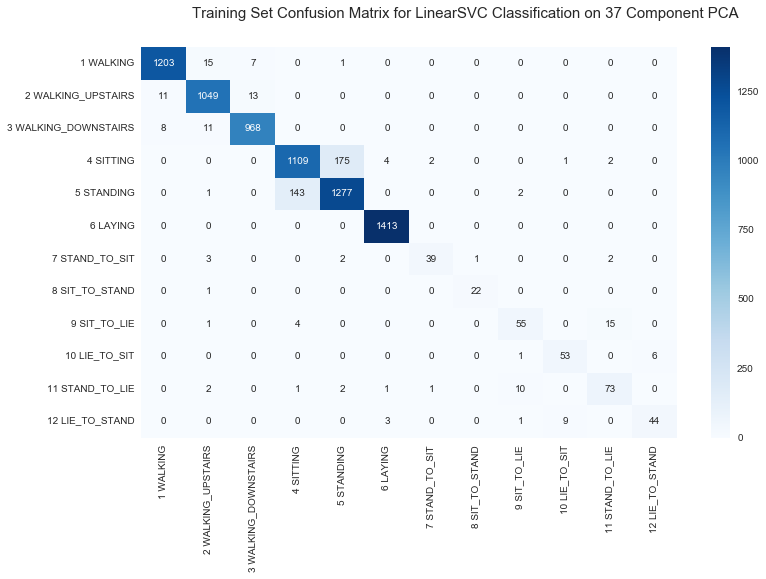

In [264]:
# Training Set Confusion Matrix 37 PCA 
plt.figure(figsize=(12, 7))

# plot 
sns.heatmap(pca_37_train_confusion_matrix, annot=True, fmt='g', cmap='Blues')

# labels and titles
plt.suptitle('Training Set Confusion Matrix for LinearSVC Classification on 37 Component PCA', fontsize=15)
plt.xticks([(x + 0.5) for x in range(12)], activites, rotation=90)
plt.yticks([(x + 0.5) for x in range(12)], activites[::-1], rotation=0)

plt.show()

In [265]:
# accuracy on the test set for a 37 component PCA 
pca_37_test_accuracy_score, pca_37_test_confusion_matrix = predict_labels(
    clf_pca_37, pca_37.transform(X_test), y_test)
print ("Accuracy score for training set: {}".format(pca_37_test_accuracy_score))

Predicting labels for Training Set using LinearSVC...
Done!
Prediction time for Training Set (secs): 0.001
Accuracy score for training set: 0.904807084124


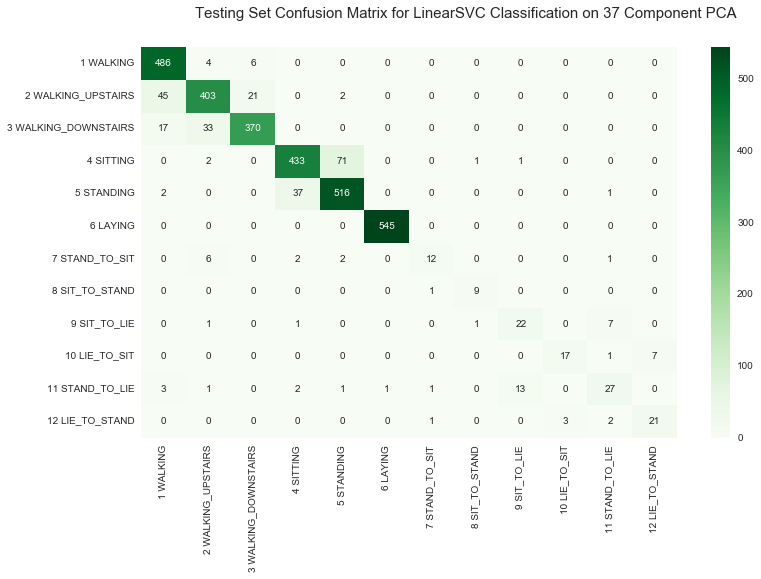

In [295]:
# Training Set Confusion Matrix 37 PCA 
plt.figure(figsize=(12, 7))

# plot 
sns.heatmap(pca_37_test_confusion_matrix, annot=True, fmt='g', cmap='Greens')

# labels and titles
plt.suptitle('Testing Set Confusion Matrix for LinearSVC Classification on 37 Component PCA', fontsize=15)
plt.xticks([(x + 0.5) for x in range(12)], activites, rotation=90)
plt.yticks([(x + 0.5) for x in range(12)], activites[::-1], rotation=0)

plt.show()

## LinearSVC model on the entire feature space

In [167]:
# LinearSVC creation 
clf = svm.LinearSVC()

# Fit model to training data
train_classifier(clf, X_train, y_train.activity.values) # reshapes the y_train dataframe into a 1D array
print (clf)  # you can inspect the learned model by printing it

Training LinearSVC...
Done!
Training time (secs): 5.151
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


In [181]:
train_accuracy_score, train_confusion_matrix = predict_labels(clf, X_train, y_train)
print ("Accuracy score for training set: {}".format(train_accuracy_score))

Predicting labels for Training Set using LinearSVC...
Done!
Prediction time for Training Set (secs): 0.026
Accuracy score for training set: 0.99446375692


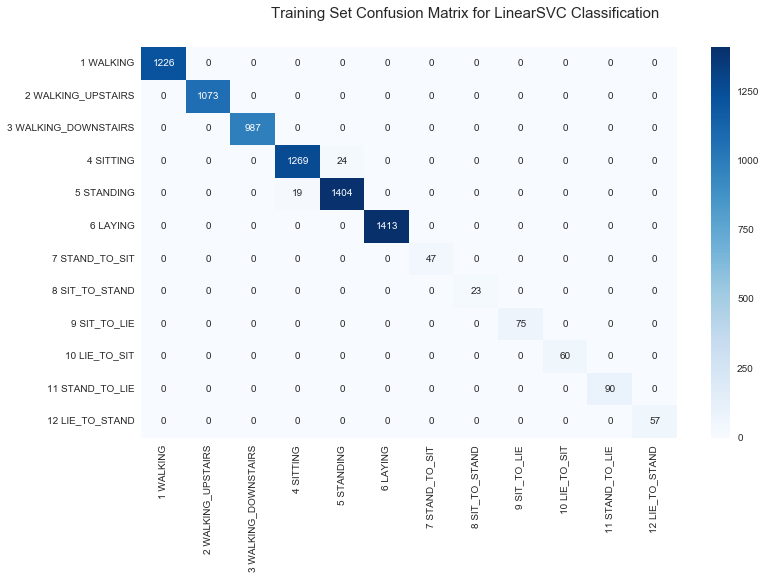

In [219]:
# Training Set Confusion Matrix 
plt.figure(figsize=(12, 7))

# plot 
sns.heatmap(train_confusion_matrix, annot=True, fmt='g', cmap='Blues')

# labels and titles
plt.suptitle('Training Set Confusion Matrix for LinearSVC Classification', fontsize=15)
plt.xticks([(x + 0.5) for x in range(12)], activites, rotation=90)
plt.yticks([(x + 0.5) for x in range(12)], activites[::-1], rotation=0)

plt.show()

In [198]:
test_accuracy_score, test_confusion_matrix = predict_labels(clf, X_test, y_test)
print ("Accuracy score for test set: {}".format(test_accuracy_score))

Predicting labels for Training Set using LinearSVC...
Done!
Prediction time for Training Set (secs): 0.009
Accuracy score for test set: 0.945604048071


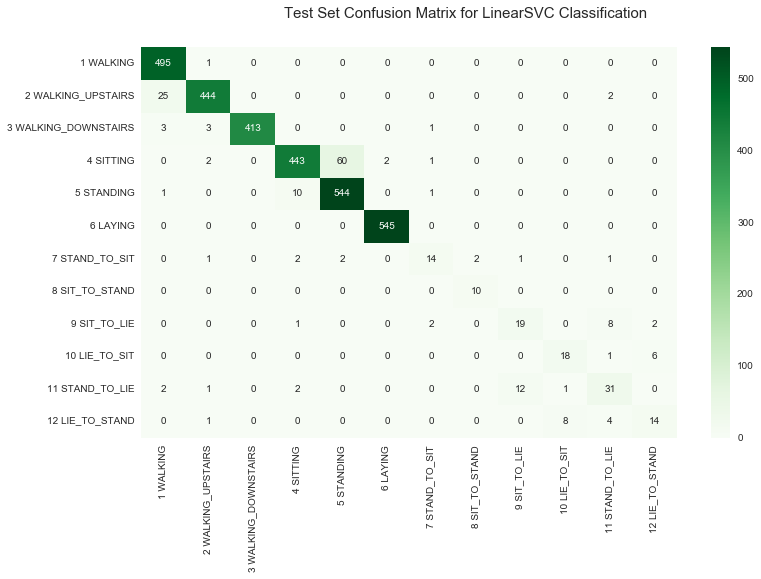

In [294]:
# Test Confusion Matrix Plot
plt.figure(figsize=(12, 7))

# plot
sns.heatmap(test_confusion_matrix, annot=True, fmt='g', cmap='Greens')

# labels and titles
plt.suptitle('Test Set Confusion Matrix for LinearSVC Classification', fontsize=15)
plt.xticks([(x + 0.5) for x in range(12)], activites, rotation=90)
plt.yticks([(x + 0.5) for x in range(12)], activites[::-1], rotation=0)

plt.show()